 Z_in= (X1 + Z_l)/((Y2 + 0.001)*(X1 + Z_l + 1/(Y2 + 0.001)))
 Z_in_vals= (25.225268063051285-28.52999215425216j)


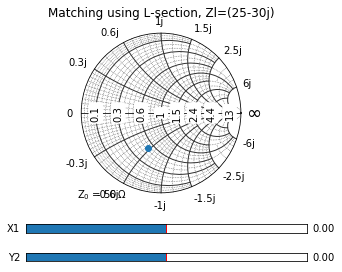

In [1]:
# Python script to calculate input
# impedance of circuit comprised
# of line section (Z_l, L_line) and
# serial impedance X

import numpy as np
import sympy as sp
import cmath
import math
import matplotlib.pyplot as plt
import smithplot
from smithplot import SmithAxes
from matplotlib.widgets import Slider

#same functions
def input_impedance(Z0, l, ZL, lambd):
    beta = 2*math.pi / lambd 
    numerator = ZL + Z0 * sp.tanh(  sp.I * beta * l)
    denominator = Z0 + ZL * sp.tanh( sp.I * beta * l)
    Zin = Z0 * numerator / denominator
    return Zin

def  serial_z(Z1,Z2):
    Zin = Z1+Z2
    return Zin

def  parallel_z(Z1,Z2):
    Zin = Z1*Z2 / (Z1+Z2)
    return Zin

Z_l,  X1, Y2  = sp.symbols(' Z_l X1  Y2')

Z1 = serial_z(Z_l, X1)
Z_in = parallel_z(Z1, 1 / (Y2+0.001))
print(' Z_in=', Z_in)

# convert to numerical
Z_in_num = sp.lambdify( (Z_l, X1 , Y2),  Z_in, "numpy")

Z_l = 25 - 1j*30
X1= 0
Y2 = 0
Z_in_vals = Z_in_num( Z_l, X1 , Y2)
print(' Z_in_vals=', Z_in_vals)

# Create a Smith Chart plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='smith')
ax.set_title("Matching using L-section, Zl=" + str(Z_l))
plt.subplots_adjust(bottom=0.25)  # Adjust space for the slider
# Create the slider axes
ax_slider_X1 = plt.axes([0.2, 0.15, 0.65, 0.03])  # Position of the slider
ax_slider_Y2 = plt.axes([0.2, 0.05, 0.65, 0.03])  # Position of the slider
# Add slider to control the scaling factor
slider_X1 = Slider(ax_slider_X1, "X1", -50.0, 50.0, valinit = 0)
slider_Y2 = Slider(ax_slider_Y2, "Y2", -0.05, 0.05, valinit = 0)
smith_data, = ax.plot( Z_in_vals ,  marker='o', linestyle='-', datatype=SmithAxes.Z_PARAMETER)
ax.grid(True)

# Define the update function for the slider
def update(val):
    X1 = 1j*slider_X1.val
    Y2 = 1j*slider_Y2.val
    r = np.real(Z_in_num(Z_l, X1 , Y2  )) /50
    x = np.imag(Z_in_num(Z_l, X1 , Y2  )) /50
    smith_data.set_data(r , x )  # Update the y-data
    fig.canvas.draw_idle()  # Redraw the figure

# Connect the slider to the update function
slider_X1.on_changed(update) 
slider_Y2.on_changed(update)  
plt.show()

